#### Method 1 (KNN mean)
- We input a vector consisting of three PLVs corresponding to three different pairs and the frequency values (in alpha band) as a eigenvalue
- Then, we add vectors from 6th second to 7th second for the same trial
- Therefore, we can obtain a four-dimensional vector as the input eigenvalues and label it as 0 (non-match) or 1 (match) based on the actual results in each trial.
- Finally, we apply K Nearest Neighbors to these vectors to train the model.


The specific characteristic values and label values are shown below

##### characteristic values:                        

| X $j$ | 1   | 2   | 3   | 4   |                        
|---------|-----|-----|-----|-----|
| $x_j$ | plv-(4,12) | plv-(11,24) | plv-(13,24) | fOS(9.97,10.69,11.46) |       

##### label values:

$$
Y = 
\left\{
    \begin{aligned}
    1\quad  &matched\\
    0\quad  &otherwise
    \end{aligned}
\right.

$$

##### Pseudo Code:


$$
\begin{aligned}
&\text { KNN } \\
&\textbf { input } \text { OSPerson1-4  }\\
&\text { Initialize } ave_{acc}=0, acc[10]={0} \quad\text { accuracy }\\
&\text { 1:}\textbf{ for } t=1,2,...,10 \quad\text { Test accuracy 10 times }\\
&\text { 2:} \quad \textbf { for } j=1,2,...,N/3 \quad\text { N trials in total}\\
&\text { 3: } \quad \quad  X_{3j}[0]= \sum_{time=6}^{7}PLV_{pair=(4,12),time,fre=9.97,trial=j} \\
&\text { 4: } \quad \quad  X_{3j}[1]= \sum_{time=6}^{7}PLV_{pair=(11,24),time,fre=9.97,trial=j} \\
&\text { 5: } \quad \quad  X_{3j}[2]= \sum_{time=6}^{7}PLV_{pair=(13,24),time,fre=9.97,trial=j} \\
&\text { 6:}  \quad \quad  X_{3j}[3]= 9.97 \\
&\text { 7: } \quad \quad  X_{3j+1}[0]= \sum_{time=6}^{7}PLV_{pair=(4,12),time,fre=10.69,trial=j} \\
&\text { 8: } \quad \quad  X_{3j+1}[1]= \sum_{time=6}^{7}PLV_{pair=(11,24),time,fre=10.69,trial=j} \\
&\text { 9: } \quad \quad  X_{3j+1}[2]= \sum_{time=6}^{7}PLV_{pair=(13,24),time,fre=10.69,trial=j} \\
&\text { 10:}  \quad \quad  X_{3j+1}[3]= 10.69 \\
&\text { 11: } \quad \quad  X_{3j+2}[0]= \sum_{time=6}^{7}PLV_{pair=(4,12),time,fre=11.46,trial=j} \\
&\text { 12: } \quad \quad  X_{3j+2}[1]= \sum_{time=6}^{7}PLV_{pair=(11,24),time,fre=11.46,trial=j} \\
&\text { 13: } \quad \quad  X_{3j+2}[2]= \sum_{time=6}^{7}PLV_{pair=(13,24),time,fre=11.46,trial=j} \\
&\text { 14:}  \quad \quad  X_{3j+2}[3]= 11.46 \\
&\text { 14:}  \quad \quad  Track[j](>10 \rightarrow 0 || \leq 10 \rightarrow 1) \gets Y[j]\\
&\text { 15:}\quad \textbf{end for } \\
&\text { 14:}\quad  sklearn-knn(X,Y) \gets acc[t]\\
&\text { 15:}\textbf{end for } \\
&\text { 15:}ave_{acc}=\frac{\sum acc[j]}{10} \\
\end{aligned}
$$

In [2]:
import scipy.io as sio
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X1=np.zeros((300,4))
y1=np.zeros((300,))

OSPerson1 = sio.loadmat("data/Person1/OSPerson1.mat")
OSPerson2 = sio.loadmat("data/Person2/OSPerson2.mat")
OSPerson3 = sio.loadmat("data/Person3/OSPerson3.mat")
OSPerson4 = sio.loadmat("data/Person4/OSPerson4.mat")

rawTracePerson1 = sio.loadmat("data/Person1/rawTracePerson1.mat")
track1 = rawTracePerson1["Track"]
rawTracePerson2 = sio.loadmat("data/Person2/rawTracePerson2.mat")
track2 = rawTracePerson2["Track"]
rawTracePerson3 = sio.loadmat("data/Person3/rawTracePerson3.mat")
track3 = rawTracePerson3["Track"]
rawTracePerson4 = sio.loadmat("data/Person4/rawTracePerson4.mat")
track4 = rawTracePerson4["Track"]



for j in range (40):
    if(track1[0][j]>10):
        y1[j*3]=0
    else:
        y1[j*3]=1
for j in range (10):
    if(track1[0][j]>10):
        y1[(j+40)*3]=0
    else:
        y1[(j+40)*3]=1

for j in range (40):
    if(track1[0][j]>10):
        y1[(j+50)*3]=0
    else:
        y1[(j+50)*3]=1

for j in range (10):
    if(track1[0][j]>10):
        y1[(j+90)*3]=0
    else:
        y1[(j+90)*3]=1

for j in range (40):
    Newperson1_1=OSPerson1["OS"][30,17,j,3]
    Newperson1_2=OSPerson1["OS"][30,17,j,27]
    Newperson1_3=OSPerson1["OS"][30,17,j,29]
    #Newperson1_4=OSPerson1["OS"][30,18,j,48]
    for i in range (5):
        Newperson1_1+=OSPerson1["OS"][31+i,17,j,3]
        Newperson1_2+=OSPerson1["OS"][31+i,17,j,27]
        Newperson1_3+=OSPerson1["OS"][31+i,17,j,29]
        #Newperson1_4+=OSPerson1["OS"][31+i,18,j,48]
        X1[j*3][0]=Newperson1_1
        X1[j*3][1]=Newperson1_2
        X1[j*3][2]=Newperson1_3
        X1[j*3][3]=OSPerson1["fOS"][17]
        #X1[j][3]=Newperson1_4
for j in range (40):
    Newperson1_1=OSPerson1["OS"][30,18,j,3]
    Newperson1_2=OSPerson1["OS"][30,18,j,27]
    Newperson1_3=OSPerson1["OS"][30,18,j,29]
    #Newperson1_4=OSPerson1["OS"][30,18,j,48]
    for i in range (5):
        Newperson1_1+=OSPerson1["OS"][31+i,18,j,3]
        Newperson1_2+=OSPerson1["OS"][31+i,18,j,27]
        Newperson1_3+=OSPerson1["OS"][31+i,18,j,29]
        #Newperson1_4+=OSPerson1["OS"][31+i,18,j,48]
        X1[j*3+1][0]=Newperson1_1
        X1[j*3+1][1]=Newperson1_2
        X1[j*3+1][2]=Newperson1_3
        X1[j*3+1][3]=OSPerson1["fOS"][18]
        #X1[j][3]=Newperson1_4
for j in range (40):
    Newperson1_1=OSPerson1["OS"][30,19,j,3]
    Newperson1_2=OSPerson1["OS"][30,19,j,27]
    Newperson1_3=OSPerson1["OS"][30,19,j,29]
    #Newperson1_4=OSPerson1["OS"][30,18,j,48]
    for i in range (5):
        Newperson1_1+=OSPerson1["OS"][31+i,19,j,3]
        Newperson1_2+=OSPerson1["OS"][31+i,19,j,27]
        Newperson1_3+=OSPerson1["OS"][31+i,19,j,29]
        #Newperson1_4+=OSPerson1["OS"][31+i,18,j,48]
        X1[j*3+2][0]=Newperson1_1
        X1[j*3+2][1]=Newperson1_2
        X1[j*3+2][2]=Newperson1_3
        X1[j*3+2][3]=OSPerson1["fOS"][19]
        #X1[j][3]=Newperson1_4
for j in range (10):
    Newperson2_1=OSPerson2["OS"][30,17,j,3]
    Newperson2_2=OSPerson2["OS"][30,17,j,27]
    Newperson2_3=OSPerson2["OS"][30,17,j,29]
    #Newperson2_4=OSPerson2["OS"][30,18,j,48]
    for i in range (5):
        Newperson2_1+=OSPerson2["OS"][31+i,17,j,3]
        Newperson2_2+=OSPerson2["OS"][31+i,17,j,27]
        Newperson2_3+=OSPerson2["OS"][31+i,17,j,29]
        #Newperson2_4+=OSPerson2["OS"][31+i,18,j,48]
        X1[(j+40)*3][0]=Newperson2_1
        X1[(j+40)*3][1]=Newperson2_2
        X1[(j+40)*3][2]=Newperson2_3
        X1[(j+40)*3][3]=OSPerson2["fOS"][17]
        #X1[j+40][3]=Newperson2_4
for j in range (10):
    Newperson2_1=OSPerson2["OS"][30,18,j,3]
    Newperson2_2=OSPerson2["OS"][30,18,j,27]
    Newperson2_3=OSPerson2["OS"][30,18,j,29]
    #Newperson2_4=OSPerson2["OS"][30,18,j,48]
    for i in range (5):
        Newperson2_1+=OSPerson2["OS"][31+i,18,j,3]
        Newperson2_2+=OSPerson2["OS"][31+i,18,j,27]
        Newperson2_3+=OSPerson2["OS"][31+i,18,j,29]
        #Newperson2_4+=OSPerson2["OS"][31+i,18,j,48]
        X1[(j+40)*3+1][0]=Newperson2_1
        X1[(j+40)*3+1][1]=Newperson2_2
        X1[(j+40)*3+1][2]=Newperson2_3
        X1[(j+40)*3+1][3]=OSPerson2["fOS"][18]
        #X1[j+40][3]=Newperson2_4
for j in range (10):
    Newperson2_1=OSPerson2["OS"][30,19,j,3]
    Newperson2_2=OSPerson2["OS"][30,19,j,27]
    Newperson2_3=OSPerson2["OS"][30,19,j,29]
    #Newperson2_4=OSPerson2["OS"][30,18,j,48]
    for i in range (5):
        Newperson2_1+=OSPerson2["OS"][31+i,19,j,3]
        Newperson2_2+=OSPerson2["OS"][31+i,19,j,27]
        Newperson2_3+=OSPerson2["OS"][31+i,19,j,29]
        #Newperson2_4+=OSPerson2["OS"][31+i,18,j,48]
        X1[(j+40)*3+2][0]=Newperson2_1
        X1[(j+40)*3+2][1]=Newperson2_2
        X1[(j+40)*3+2][2]=Newperson2_3
        X1[(j+40)*3+2][3]=OSPerson2["fOS"][19]
        #X1[j+40][3]=Newperson2_4
for j in range (40):
    Newperson3_1=OSPerson3["OS"][30,17,j,3]
    Newperson3_2=OSPerson3["OS"][30,17,j,27]
    Newperson3_3=OSPerson3["OS"][30,17,j,29]
    #Newperson3_4=OSPerson3["OS"][30,18,j,48]
    for i in range (5):
        Newperson3_1+=OSPerson3["OS"][31+i,17,j,3]
        Newperson3_2+=OSPerson3["OS"][31+i,17,j,27]
        Newperson3_3+=OSPerson3["OS"][31+i,17,j,29]
        #Newperson3_4+=OSPerson3["OS"][31+i,18,j,48]
        X1[(j+50)*3][0]=Newperson3_1
        X1[(j+50)*3][1]=Newperson3_2
        X1[(j+50)*3][2]=Newperson3_3
        X1[(j+50)*3][3]=OSPerson3["fOS"][17]
        #X1[j+50][3]=Newperson3_4
for j in range (40):
    Newperson3_1=OSPerson3["OS"][30,18,j,3]
    Newperson3_2=OSPerson3["OS"][30,18,j,27]
    Newperson3_3=OSPerson3["OS"][30,18,j,29]
    #Newperson3_4=OSPerson3["OS"][30,18,j,48]
    for i in range (5):
        Newperson3_1+=OSPerson3["OS"][31+i,18,j,3]
        Newperson3_2+=OSPerson3["OS"][31+i,18,j,27]
        Newperson3_3+=OSPerson3["OS"][31+i,18,j,29]
        #Newperson3_4+=OSPerson3["OS"][31+i,18,j,48]
        X1[(j+50)*3+1][0]=Newperson3_1
        X1[(j+50)*3+1][1]=Newperson3_2
        X1[(j+50)*3+1][2]=Newperson3_3
        X1[(j+50)*3+1][3]=OSPerson3["fOS"][18]
        #X1[j+50][3]=Newperson3_4
for j in range (40):
    Newperson3_1=OSPerson3["OS"][30,19,j,3]
    Newperson3_2=OSPerson3["OS"][30,19,j,27]
    Newperson3_3=OSPerson3["OS"][30,19,j,29]
    #Newperson3_4=OSPerson3["OS"][30,18,j,48]
    for i in range (5):
        Newperson3_1+=OSPerson3["OS"][31+i,19,j,3]
        Newperson3_2+=OSPerson3["OS"][31+i,19,j,27]
        Newperson3_3+=OSPerson3["OS"][31+i,19,j,29]
        #Newperson3_4+=OSPerson3["OS"][31+i,18,j,48]
        X1[(j+50)*3+2][0]=Newperson3_1
        X1[(j+50)*3+2][1]=Newperson3_2
        X1[(j+50)*3+2][2]=Newperson3_3
        X1[(j+50)*3+2][3]=OSPerson3["fOS"][19]
        #X1[j+50][3]=Newperson3_4
for j in range (10):
    Newperson4_1=OSPerson4["OS"][30,17,j,3]
    Newperson4_2=OSPerson4["OS"][30,17,j,27]
    Newperson4_3=OSPerson4["OS"][30,17,j,29]
    #Newperson4_4=OSPerson4["OS"][30,18,j,48]
    for i in range (5):
        Newperson4_1+=OSPerson4["OS"][31+i,17,j,3]
        Newperson4_2+=OSPerson4["OS"][31+i,17,j,27]
        Newperson4_3+=OSPerson4["OS"][31+i,17,j,29]
        #Newperson4_4+=OSPerson4["OS"][31+i,18,j,48]
        X1[(j+90)*3][0]=Newperson4_1
        X1[(j+90)*3][1]=Newperson4_2
        X1[(j+90)*3][2]=Newperson4_3
        X1[(j+90)*3][3]=OSPerson4["fOS"][17]
        #X1[j+90][3]=Newperson4_4
for j in range (10):
    Newperson4_1=OSPerson4["OS"][30,18,j,3]
    Newperson4_2=OSPerson4["OS"][30,18,j,27]
    Newperson4_3=OSPerson4["OS"][30,18,j,29]
    #Newperson4_4=OSPerson4["OS"][30,18,j,48]
    for i in range (5):
        Newperson4_1+=OSPerson4["OS"][31+i,18,j,3]
        Newperson4_2+=OSPerson4["OS"][31+i,18,j,27]
        Newperson4_3+=OSPerson4["OS"][31+i,18,j,29]
        #Newperson4_4+=OSPerson4["OS"][31+i,18,j,48]
        X1[(j+90)*3+1][0]=Newperson4_1
        X1[(j+90)*3+1][1]=Newperson4_2
        X1[(j+90)*3+1][2]=Newperson4_3
        X1[(j+90)*3+1][3]=OSPerson4["fOS"][18]
        #X1[j+90][3]=Newperson4_4
for j in range (10):
    Newperson4_1=OSPerson4["OS"][30,19,j,3]
    Newperson4_2=OSPerson4["OS"][30,19,j,27]
    Newperson4_3=OSPerson4["OS"][30,19,j,29]
    #Newperson4_4=OSPerson4["OS"][30,18,j,48]
    for i in range (5):
        Newperson4_1+=OSPerson4["OS"][31+i,19,j,3]
        Newperson4_2+=OSPerson4["OS"][31+i,19,j,27]
        Newperson4_3+=OSPerson4["OS"][31+i,19,j,29]
        #Newperson4_4+=OSPerson4["OS"][31+i,18,j,48]
        X1[(j+90)*3+2][0]=Newperson4_1
        X1[(j+90)*3+2][1]=Newperson4_2
        X1[(j+90)*3+2][2]=Newperson4_3
        X1[(j+90)*3+2][3]=OSPerson4["fOS"][19]
        #X1[j+90][3]=Newperson4_4
for i in range (300):
    print('(X_',i,',Y_',i,'):',(X1[i,:],y1[i]))


(X_ 0 ,Y_ 0 ): (array([4.68543099, 2.50321963, 3.37107244, 9.97891578]), 0.0)
(X_ 1 ,Y_ 1 ): (array([ 4.95233646,  3.21696528,  4.10557969, 10.69513711]), 0.0)
(X_ 2 ,Y_ 2 ): (array([ 5.336097  ,  4.19062276,  3.97766167, 11.46276414]), 0.0)
(X_ 3 ,Y_ 3 ): (array([4.45891079, 3.88617519, 2.64644309, 9.97891578]), 0.0)
(X_ 4 ,Y_ 4 ): (array([ 5.33452714,  4.57430841,  2.16510255, 10.69513711]), 0.0)
(X_ 5 ,Y_ 5 ): (array([ 5.49217185,  4.5964921 ,  1.40013744, 11.46276414]), 0.0)
(X_ 6 ,Y_ 6 ): (array([4.18929603, 4.07876938, 2.72654774, 9.97891578]), 0.0)
(X_ 7 ,Y_ 7 ): (array([ 5.45889856,  4.54603735,  1.71032267, 10.69513711]), 0.0)
(X_ 8 ,Y_ 8 ): (array([ 5.70429761,  5.49493767,  0.56854196, 11.46276414]), 0.0)
(X_ 9 ,Y_ 9 ): (array([5.08585241, 2.65015047, 3.47073618, 9.97891578]), 0.0)
(X_ 10 ,Y_ 10 ): (array([ 5.12289664,  2.54671241,  2.78201971, 10.69513711]), 0.0)
(X_ 11 ,Y_ 11 ): (array([ 4.93930978,  2.09139265,  2.63653265, 11.46276414]), 0.0)
(X_ 12 ,Y_ 12 ): (array([4.4

In [35]:
av=0
ac_list = []
for c in range (20):
    for j in range (40):
        Newperson1_1=OSPerson1["OS"][30,17,j,3]
        Newperson1_2=OSPerson1["OS"][30,17,j,27]
        Newperson1_3=OSPerson1["OS"][30,17,j,29]
        #Newperson1_4=OSPerson1["OS"][30,18,j,48]
        for i in range (5):
            Newperson1_1+=OSPerson1["OS"][31+i,17,j,3]
            Newperson1_2+=OSPerson1["OS"][31+i,17,j,27]
            Newperson1_3+=OSPerson1["OS"][31+i,17,j,29]
            #Newperson1_4+=OSPerson1["OS"][31+i,18,j,48]
            X1[j*3][0]=Newperson1_1
            X1[j*3][1]=Newperson1_2
            X1[j*3][2]=Newperson1_3
            X1[j*3][3]=OSPerson1["fOS"][17]
            #X1[j][3]=Newperson1_4
    for j in range (40):
        Newperson1_1=OSPerson1["OS"][30,18,j,3]
        Newperson1_2=OSPerson1["OS"][30,18,j,27]
        Newperson1_3=OSPerson1["OS"][30,18,j,29]
        #Newperson1_4=OSPerson1["OS"][30,18,j,48]
        for i in range (5):
            Newperson1_1+=OSPerson1["OS"][31+i,18,j,3]
            Newperson1_2+=OSPerson1["OS"][31+i,18,j,27]
            Newperson1_3+=OSPerson1["OS"][31+i,18,j,29]
            #Newperson1_4+=OSPerson1["OS"][31+i,18,j,48]
            X1[j*3+1][0]=Newperson1_1
            X1[j*3+1][1]=Newperson1_2
            X1[j*3+1][2]=Newperson1_3
            X1[j*3+1][3]=OSPerson1["fOS"][18]
            #X1[j][3]=Newperson1_4
    for j in range (40):
        Newperson1_1=OSPerson1["OS"][30,19,j,3]
        Newperson1_2=OSPerson1["OS"][30,19,j,27]
        Newperson1_3=OSPerson1["OS"][30,19,j,29]
        #Newperson1_4=OSPerson1["OS"][30,18,j,48]
        for i in range (5):
            Newperson1_1+=OSPerson1["OS"][31+i,19,j,3]
            Newperson1_2+=OSPerson1["OS"][31+i,19,j,27]
            Newperson1_3+=OSPerson1["OS"][31+i,19,j,29]
            #Newperson1_4+=OSPerson1["OS"][31+i,18,j,48]
            X1[j*3+2][0]=Newperson1_1
            X1[j*3+2][1]=Newperson1_2
            X1[j*3+2][2]=Newperson1_3
            X1[j*3+2][3]=OSPerson1["fOS"][19]
            #X1[j][3]=Newperson1_4
    for j in range (10):
        Newperson2_1=OSPerson2["OS"][30,17,j,3]
        Newperson2_2=OSPerson2["OS"][30,17,j,27]
        Newperson2_3=OSPerson2["OS"][30,17,j,29]
        #Newperson2_4=OSPerson2["OS"][30,18,j,48]
        for i in range (5):
            Newperson2_1+=OSPerson2["OS"][31+i,17,j,3]
            Newperson2_2+=OSPerson2["OS"][31+i,17,j,27]
            Newperson2_3+=OSPerson2["OS"][31+i,17,j,29]
            #Newperson2_4+=OSPerson2["OS"][31+i,18,j,48]
            X1[(j+40)*3][0]=Newperson2_1
            X1[(j+40)*3][1]=Newperson2_2
            X1[(j+40)*3][2]=Newperson2_3
            X1[(j+40)*3][3]=OSPerson2["fOS"][17]
            #X1[j+40][3]=Newperson2_4
    for j in range (10):
        Newperson2_1=OSPerson2["OS"][30,18,j,3]
        Newperson2_2=OSPerson2["OS"][30,18,j,27]
        Newperson2_3=OSPerson2["OS"][30,18,j,29]
        #Newperson2_4=OSPerson2["OS"][30,18,j,48]
        for i in range (5):
            Newperson2_1+=OSPerson2["OS"][31+i,18,j,3]
            Newperson2_2+=OSPerson2["OS"][31+i,18,j,27]
            Newperson2_3+=OSPerson2["OS"][31+i,18,j,29]
            #Newperson2_4+=OSPerson2["OS"][31+i,18,j,48]
            X1[(j+40)*3+1][0]=Newperson2_1
            X1[(j+40)*3+1][1]=Newperson2_2
            X1[(j+40)*3+1][2]=Newperson2_3
            X1[(j+40)*3+1][3]=OSPerson2["fOS"][18]
            #X1[j+40][3]=Newperson2_4
    for j in range (10):
        Newperson2_1=OSPerson2["OS"][30,19,j,3]
        Newperson2_2=OSPerson2["OS"][30,19,j,27]
        Newperson2_3=OSPerson2["OS"][30,19,j,29]
        #Newperson2_4=OSPerson2["OS"][30,18,j,48]
        for i in range (5):
            Newperson2_1+=OSPerson2["OS"][31+i,19,j,3]
            Newperson2_2+=OSPerson2["OS"][31+i,19,j,27]
            Newperson2_3+=OSPerson2["OS"][31+i,19,j,29]
            #Newperson2_4+=OSPerson2["OS"][31+i,18,j,48]
            X1[(j+40)*3+2][0]=Newperson2_1
            X1[(j+40)*3+2][1]=Newperson2_2
            X1[(j+40)*3+2][2]=Newperson2_3
            X1[(j+40)*3+2][3]=OSPerson2["fOS"][19]
            #X1[j+40][3]=Newperson2_4
    for j in range (40):
        Newperson3_1=OSPerson3["OS"][30,17,j,3]
        Newperson3_2=OSPerson3["OS"][30,17,j,27]
        Newperson3_3=OSPerson3["OS"][30,17,j,29]
        #Newperson3_4=OSPerson3["OS"][30,18,j,48]
        for i in range (5):
            Newperson3_1+=OSPerson3["OS"][31+i,17,j,3]
            Newperson3_2+=OSPerson3["OS"][31+i,17,j,27]
            Newperson3_3+=OSPerson3["OS"][31+i,17,j,29]
            #Newperson3_4+=OSPerson3["OS"][31+i,18,j,48]
            X1[(j+50)*3][0]=Newperson3_1
            X1[(j+50)*3][1]=Newperson3_2
            X1[(j+50)*3][2]=Newperson3_3
            X1[(j+50)*3][3]=OSPerson3["fOS"][17]
            #X1[j+50][3]=Newperson3_4
    for j in range (40):
        Newperson3_1=OSPerson3["OS"][30,18,j,3]
        Newperson3_2=OSPerson3["OS"][30,18,j,27]
        Newperson3_3=OSPerson3["OS"][30,18,j,29]
        #Newperson3_4=OSPerson3["OS"][30,18,j,48]
        for i in range (5):
            Newperson3_1+=OSPerson3["OS"][31+i,18,j,3]
            Newperson3_2+=OSPerson3["OS"][31+i,18,j,27]
            Newperson3_3+=OSPerson3["OS"][31+i,18,j,29]
            #Newperson3_4+=OSPerson3["OS"][31+i,18,j,48]
            X1[(j+50)*3+1][0]=Newperson3_1
            X1[(j+50)*3+1][1]=Newperson3_2
            X1[(j+50)*3+1][2]=Newperson3_3
            X1[(j+50)*3+1][3]=OSPerson3["fOS"][18]
            #X1[j+50][3]=Newperson3_4
    for j in range (40):
        Newperson3_1=OSPerson3["OS"][30,19,j,3]
        Newperson3_2=OSPerson3["OS"][30,19,j,27]
        Newperson3_3=OSPerson3["OS"][30,19,j,29]
        #Newperson3_4=OSPerson3["OS"][30,18,j,48]
        for i in range (5):
            Newperson3_1+=OSPerson3["OS"][31+i,19,j,3]
            Newperson3_2+=OSPerson3["OS"][31+i,19,j,27]
            Newperson3_3+=OSPerson3["OS"][31+i,19,j,29]
            #Newperson3_4+=OSPerson3["OS"][31+i,18,j,48]
            X1[(j+50)*3+2][0]=Newperson3_1
            X1[(j+50)*3+2][1]=Newperson3_2
            X1[(j+50)*3+2][2]=Newperson3_3
            X1[(j+50)*3+2][3]=OSPerson3["fOS"][19]
            #X1[j+50][3]=Newperson3_4
    for j in range (10):
        Newperson4_1=OSPerson4["OS"][30,17,j,3]
        Newperson4_2=OSPerson4["OS"][30,17,j,27]
        Newperson4_3=OSPerson4["OS"][30,17,j,29]
        #Newperson4_4=OSPerson4["OS"][30,18,j,48]
        for i in range (5):
            Newperson4_1+=OSPerson4["OS"][31+i,17,j,3]
            Newperson4_2+=OSPerson4["OS"][31+i,17,j,27]
            Newperson4_3+=OSPerson4["OS"][31+i,17,j,29]
            #Newperson4_4+=OSPerson4["OS"][31+i,18,j,48]
            X1[(j+90)*3][0]=Newperson4_1
            X1[(j+90)*3][1]=Newperson4_2
            X1[(j+90)*3][2]=Newperson4_3
            X1[(j+90)*3][3]=OSPerson4["fOS"][17]
            #X1[j+90][3]=Newperson4_4
    for j in range (10):
        Newperson4_1=OSPerson4["OS"][30,18,j,3]
        Newperson4_2=OSPerson4["OS"][30,18,j,27]
        Newperson4_3=OSPerson4["OS"][30,18,j,29]
        #Newperson4_4=OSPerson4["OS"][30,18,j,48]
        for i in range (5):
            Newperson4_1+=OSPerson4["OS"][31+i,18,j,3]
            Newperson4_2+=OSPerson4["OS"][31+i,18,j,27]
            Newperson4_3+=OSPerson4["OS"][31+i,18,j,29]
            #Newperson4_4+=OSPerson4["OS"][31+i,18,j,48]
            X1[(j+90)*3+1][0]=Newperson4_1
            X1[(j+90)*3+1][1]=Newperson4_2
            X1[(j+90)*3+1][2]=Newperson4_3
            X1[(j+90)*3+1][3]=OSPerson4["fOS"][18]
            #X1[j+90][3]=Newperson4_4
    for j in range (10):
        Newperson4_1=OSPerson4["OS"][30,19,j,3]
        Newperson4_2=OSPerson4["OS"][30,19,j,27]
        Newperson4_3=OSPerson4["OS"][30,19,j,29]
        #Newperson4_4=OSPerson4["OS"][30,18,j,48]
        for i in range (5):
            Newperson4_1+=OSPerson4["OS"][31+i,19,j,3]
            Newperson4_2+=OSPerson4["OS"][31+i,19,j,27]
            Newperson4_3+=OSPerson4["OS"][31+i,19,j,29]
            #Newperson4_4+=OSPerson4["OS"][31+i,18,j,48]
            X1[(j+90)*3+2][0]=Newperson4_1
            X1[(j+90)*3+2][1]=Newperson4_2
            X1[(j+90)*3+2][2]=Newperson4_3
            X1[(j+90)*3+2][3]=OSPerson4["fOS"][19]
            #X1[j+90][3]=Newperson4_4
    x_tr1, x_te1, y_tr1, y_te1 = train_test_split(X1, y1, test_size=0.3)

    model1 = svm.SVC(C=25, kernel='rbf',decision_function_shape='ovo')
    # model1=KNeighborsClassifier(n_neighbors=3)
    model1.fit(x_tr1, y_tr1)
    av+=accuracy_score(y_te1,model1.predict(x_te1))
    ac_list.append(accuracy_score(y_te1,model1.predict(x_te1)))
av=av/20
print('The accuracy is:', av)

The accuracy is: 0.8422222222222224


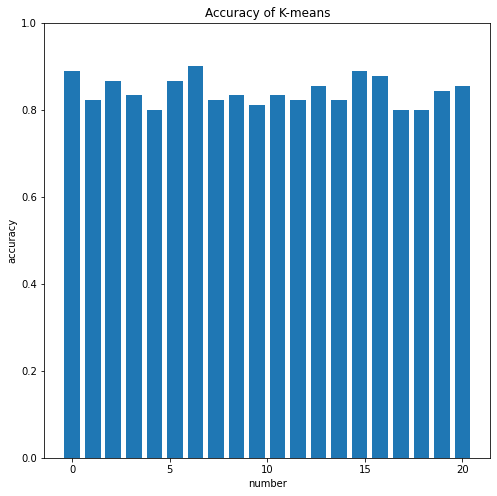

In [39]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8)) 
plt.ylim(0, 1)
x_axis = np.linspace(0,20,20)
plt.title("Accuracy of K-means")
plt.ylabel("accuracy")
plt.xlabel("number")

plt.bar(x_axis, ac_list)
plt.show()

Through this algorithm, we obtain an accuracy of approximately 81%-84%

#### References:
[1]: K. Martín-Chinea, J. F. Gómez-González and L. Acosta, "A New PLV-Spatial Filtering to Improve the Classification Performance in BCI Systems," in IEEE Transactions on Neural Systems and Rehabilitation Engineering, vol. 30, pp. 2275-2282, 2022, doi: 10.1109/TNSRE.2022.3198021.

[2]:＾哪来的＆永远～, 从公式到代码详细解析PLV, https://blog.csdn.net/qq_45538220/article/details/124435846, 2022-04-26